In [1]:
import os
import tools
import numpy as np
import pandas as pd
import scanpy as sc

sc.logging.print_header()

scanpy==1.8.1 anndata==0.7.6 umap==0.5.1 numpy==1.22.4 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.1 pynndescent==0.5.2


In [2]:
os.chdir('/lustre/scratch117/cellgen/team297/kt16/COVID_imperial_renal')

In [3]:
bdata = sc.read_h5ad('h5ad/df.fil3_gex_bcells_no_CLL_vdj_230622.h5ad')
bdata

AnnData object with n_obs × n_vars = 68683 × 330
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartment

In [7]:
ethnicity = pd.read_csv('estimated_ethnicity.txt', sep = "\t")
ethnicity

,patient_id,ethnicity,corrected_ethnicity,PC1_nonafricanVsAfrican,PC2_asianVsEuropean
0,C103,asian,European,8.366688,-5.166119
1,C116,white,European,14.181269,-22.922029
2,C123,asian,Asian,6.961038,12.203095
3,C214,white,European,-4.285705,-11.177220
4,C40,black,African,-81.661885,-14.729245
...,...,...,...,...,...
58,C169,asian,Asian,5.022924,22.179206
59,C170,asian,Asian,6.293071,19.702170
60,C187,other,European,16.564712,-32.138822
61,C190,white,European,14.185059,-44.826899


... storing 'corrected_ethnicity' as categorical


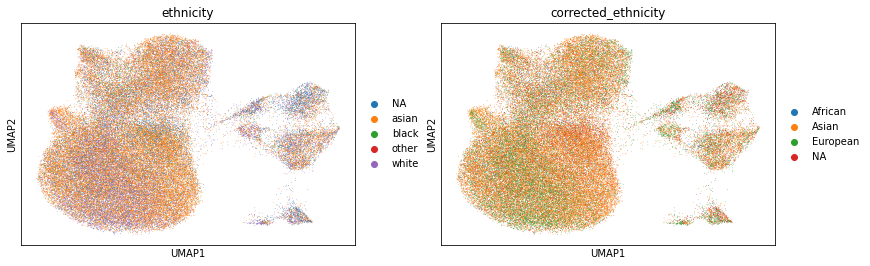

In [5]:
for x in ['corrected_ethnicity', 'PC1_nonafricanVsAfrican', 'PC2_asianVsEuropean']:
    tmp_dict = dict(zip(ethnicity['patient_id'], ethnicity[x]))
    if x == 'corrected_ethnicity':
        tmp_dict.update({'NA':'NA'})
    else:
        tmp_dict.update({'NA':np.nan})
    bdata.obs[x] = [tmp_dict[y] for y in bdata.obs['individual_id']]
sc.pl.umap(bdata, color = ['ethnicity', 'corrected_ethnicity'])

In [6]:
bdata.write('h5ad/df.fil3_gex_bcells_no_CLL_vdj_230622.h5ad', compression = 'gzip')